In [5]:
import numpy as np
import networkx as nx
import os
from random import shuffle          # importamos las librerias necesarias
import matplotlib.pylab as plt       
%matplotlib inline
from matplotlib.pyplot import title,xlabel,ylabel,show

In [6]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

In [7]:
def grafo(datosRed):
    G = nx.Graph()
    for i in range(np.shape(datosRed)[0]):
        G.add_edges_from([(datosRed[i][0],datosRed[i][1])])
    return G 

In [8]:
APMS = ldata('yeast_AP-MS.txt')
grafoAPMS = grafo(APMS)

LIT = ldata('yeast_LIT.txt')
grafoLIT = grafo(LIT)


In [9]:
Y2H = ldata('yeast_Y2H.txt')
grafoY2H = grafo(Y2H)

essentiality = ldata('Essential.txt')
grafoEssentiality = grafo(essentiality)

LITRegurly = ldata('yeast_LIT_Reguly.txt')


In [10]:
def abrirRed(lista):

    archivoAbierto = []

    for array in lista:
        archivoAbierto.append([array[0], array[1]])
        
    archivoAbiertoCortado = archivoAbierto[1:len(archivoAbierto)]
    return archivoAbiertoCortado

In [11]:
LITRegurlyOpened = abrirRed(LITRegurly)
#type(LITRegurlyOpened)
grafoLITREG = grafo(LITRegurlyOpened)


In [12]:
setAPMS = set(grafoAPMS.edges())
setLIT = set(grafoLIT.edges())

#chequeamos que no nos den mas de una vez el mismo enlace 
len(grafoLIT.edges()), len(setLIT)
len(grafoAPMS.edges()), len(setAPMS)

(9070, 9070)

In [13]:
#vemos el overlap entre los enlaces de los grafos 
def overlap(grafo1, grafo2):
    setGrafo1 = set(grafo1.edges())
    setGrafo2 = set(grafo2.edges())
    overlap = setGrafo1.intersection(setGrafo2)
    fracOverlapNorm1 = len(overlap)/len(setGrafo1)
    fracOverlapNorm2 = len(overlap)/len(setGrafo2)
    return [fracOverlapNorm1, fracOverlapNorm2]

In [14]:
overAPMSLIT = overlap(grafoAPMS, grafoLIT)
overAPMSY2H = overlap(grafoAPMS, grafoY2H)
overAPMSLITREG = overlap(grafoAPMS, grafoLITREG)
overAPMSLIT, overAPMSY2H, overAPMSLITREG

([0.08357221609702316, 0.25914529914529916],
 [0.019294377067254686, 0.059726962457337884],
 [0.14531422271223815, 0.11114859166807219])

In [15]:
setAPMSTransp = {(protein2,protein1) for protein1, protein2 in setAPMS}
setLITTransp = {(protein2,protein1) for protein1, protein2 in setLIT}

overlapTransp1 = setAPMSTransp.intersection(setLIT)
len(overlapTransp1)

#overlapTotal = overlap | overlapTransp1


#lenOverlapTotal = len(overlap) + len(overlapTransp1)
#overlapMedLIT = lenOverlapTotal/len(setLIT)                          #respecto del que dejamos fijo 

#overlapMedAPMS = lenOverlapTotal/len(setAPMS) 
#overlapMedLIT, overlapMedAPMS

#len(overlapTotal), len(overlap), len(overlapTransp1)


540

In [16]:
#nos da para el culo....etonces nos preguntamos si es que pasa A B -- B A y lo contabamos dos veces... 

In [17]:
repetidosLIT = setLIT.intersection(setLITTransp)

repetidosLITTransp = {(protein2,protein1) for protein1, protein2 in repetidosLIT}

#overlapRepetidosLIT =  repetidosLITTransp.intersection(overlapTotal)
#suma = 0
#for elem in repetidosLIT:
#    if elem[0] == elem[1]:
#        suma  = suma + 1
        
#if suma == len(repetidosLIT):
#    print("self loops!")

In [18]:
repetidosAPMS = setAPMS.intersection(setAPMSTransp)

repetidosAPMSTransp = {(protein2,protein1) for protein1, protein2 in repetidosAPMS}

len(repetidosAPMS), len(repetidosAPMSTransp)

(0, 0)

# C. LA FIGURA 

In [19]:
#el flash para la figura 
#me armo una lista de los nodos ordenados segun el grado (de mayor a menor) 
#agarro el grado k cuantos nodos tienen al menos ese grado, calculo la fraccion sobre el total de nodos ---eje x 
#la fraccion de ese conjunto que son esenciales (biologicamente..) del archivo que ya tenemos. 



In [20]:
def ordenanodos(G): #G:grafo, criterio=diccionario 'nombredenodo':parametro
    dictCriterio = dict(G.degree())
    parametroOrdenado = sorted(set(dictCriterio.values()), reverse=True)
    nodosOrdenados = []
    kNodosOrdenados = []
    for j in parametroOrdenado:
        for key,value in dictCriterio.items():
            if value==j:
                nodosOrdenados.append(key)
                kNodosOrdenados.append(value)
    return([nodosOrdenados,kNodosOrdenados])

In [21]:
#para APMS 
#donde la primera componente es un array con los nodos y 
#la segunda componente es el grado de cada uno de ellos
#nodosOrdenadosAPMS[1]
nodosOrdenadosAPMS = ordenanodos(grafoAPMS)
nodosOrdenadosLIT = ordenanodos(grafoLIT)
nodosOrdenadosY2H = ordenanodos(grafoY2H)


In [18]:
#dict(grafoAPMS.degree()).values()
len(nodosOrdenadosAPMS[1]), len(grafoAPMS.nodes())

(1622, 1622)

In [47]:
#quiero saber cuantos tienen cada uno de los grados

def NodosYGradoK(grafo):

    dictCriterio = dict(grafo.degree())
    gradosOrdenados = sorted(set(dictCriterio.values()), reverse=True) # me los da los grados ordenados 
    nodosOrdenados = ordenanodos(grafo)
    gradosNodos = nodosOrdenados[1]

    nodosGradoK = []
    grado = []

    for ktarget in set(gradosNodos):
        nodosKTarget = 0
        for k in gradosNodos:
            if ktarget == k:
                nodosKTarget = nodosKTarget + 1
            #grado.append(ktarget)
        nodosGradoK.append(nodosKTarget)


    if sum(nodosGradoK) == len(grafo.nodes()):
        print("vamo")
    else:
        print("algo  mal")
    return([set(gradosNodos),nodosGradoK])

In [52]:
APMS = NodosYGradoK(grafoAPMS)[1]

vamo


In [19]:
#quiero saber cuantos tienen cada uno de los grados

def FracNodosAlMenosGradoK(grafo):

    dictCriterio = dict(grafo.degree())
    gradosOrdenados = sorted(set(dictCriterio.values()), reverse=True) # me los da los grados ordenados 
    nodosOrdenados = ordenanodos(grafo)
    gradosNodos = nodosOrdenados[1]

    nodosAlMenosK = []

    for ktarget in gradosOrdenados:
        nodosAlMenosKTarget = 0
        for k in gradosNodos:
            if ktarget <= k:
                nodosAlMenosKTarget = nodosAlMenosKTarget + 1
                fracNodosAlMenosKTarget = nodosAlMenosKTarget#/len(grafo.nodes())
        nodosAlMenosK.append(fracNodosAlMenosKTarget)

#si hice las cosas bien, la cantidad de nodos que al menos tienen grado 1 deben ser todos mis nodos
    for key, value in fracNumeroNodosAlMenosGrado.items():
        if value == 1:
            if key == len(grafoAPMS.nodes())/len(grafo.nodes()):
                print('bien hecho')
            else:
                print('algo mal!')
    return([nodosAlMenosK,ordenados])

In [20]:
nodosAlMenosGradoKAPMS = NodosAlMenosGradoK(grafoAPMS)
#grafico de cantidad de nodos que tienen al menos grado k en funcion del grado k 

fracNodosAlMenosGradoKAPMS = []
for i in range(len(nodosAlMenosGradoKAPMS[0])):
    fracNodosAlMenosGradoKAPMS.append(nodosAlMenosGradoKAPMS[0][i]/len(grafoAPMS.nodes()))
    
plt.plot(nodosAlMenosGradoKAPMS[1], fracNodosAlMenosGradoKAPMS)



NameError: name 'fracNumeroNodosAlMenosGrado' is not defined

In [ ]:
#ahora lo que me queda hacer es dado los N nodos que tienen al menos grado k, ver la fraccion de ellos que son esenciales 

In [65]:
def nombreNodosAlMenosGradoK(grafo):

    dictCriterio = dict(grafo.degree())
    gradosOrdenados = sorted(set(dictCriterio.values()), reverse=True) # me los da los grados ordenados 
    nodosOrdenados = ordenanodos(grafo)
    gradosNodos = nodosOrdenados[1]
    nombreNodos = nodosOrdenados[0]

    nombreNodosAlMenosK = []
    alMenosK = []
    fracc = []

    for itarget in range(len(gradosOrdenados)):
        nodosAlMenosKTarget = 0
        for i in range(len(gradosNodos)):
            if gradosOrdenados[itarget] <= gradosNodos[i]:
                nombreNodosAlMenosK.append(nombreNodos[i])
                alMenosK.append(gradosOrdenados[itarget])
                fracc.append(gradosOrdenados[itarget]/len(grafo.nodes()))
#si hice las cosas bien, la cantidad de nodos que al menos tienen grado 1 deben ser todos mis nodos
    nodosTotal = 0
    for i in range(len(nombreNodosAlMenosK)):
        if alMenosK[i] == 1:
            nodosTotal = nodosTotal + 1
    if nodosTotal == len(grafo.nodes()):
        print('bien!')
    return([nombreNodosAlMenosK,alMenosK,fracc])

In [71]:
nombreNodosAPMS = nombreNodosAlMenosGradoK(grafoAPMS)
#ahora tengo dos vectores, uno que es el nombre del nodo y otro que me dice al menos su grado. entonces..
#ahora deberia pasearme por el vector de los grados sorted, pararme en el nombre de alguno de sus nodos (parar un dado k)
#y preguntarme si es esencial.. comparandolo con los elementos de mim grafo esencial y si lo es, ir contandolo 
#para tener la fraccion de esenciales 
#nombreNodosAPMS[1]


bien!


In [73]:
len(nombreNodosAPMS[1])

17870

In [55]:
nodosAlMenosGradoKAPMS = nombreNodosAPMS[1]

In [56]:
#OJO QUE USO grafoEssentiality.nodes() DONDE ME APARECEN MUCHOS NOMBRES, ENTRE ELLOS LOS NOMBRES DE LAS PROTEINAS ESENCIALES 

def fraccEssentials(grafo):

    dictCriterio = dict(grafo.degree())
    gradosOrdenados = sorted(set(dictCriterio.values()), reverse=True)
    nombresNodosEssential = list(grafoEssentiality.nodes())
    nombreNodosGrafo = nombreNodosAlMenosGradoK(grafo)

    cantEssentials = []
    alMenosGrado = []

    for k in gradosOrdenados:
        totalNodosParaK = 0
        for i in range(len(nombreNodosGrafo[1])):
            if k == nombreNodosAPMS[1][i]:
                nodoTarget = nombreNodosGrafo[0][i]
                for nombreNodo in nombresNodosEssential:
                    if nodoTarget == nombreNodo:
                        totalNodosParaK = totalNodosParaK + 1 
        cantEssentials.append(totalNodosParaK)
        alMenosGrado.append(k)
    essentials = [cantEssentials, alMenosGrado]
    return essentials

In [57]:
essentials = fraccEssentials(grafoAPMS)

bien!


In [51]:
#essentials es un vector qeu tiene en la primera fila la cantidad de nodos esenciales de al menos k grado, y la segunda fila el k grado 
#nodosAlMenosGradoKAPMS #es un vector que tiene en la primera fila la cantidad de nodos de al menos k grado, y la segunda fila el k grado 
#len(essentials[0]),len(nodosAlMenosGradoKAPMS[0])


In [58]:
#para hacer eso len(essentials[0]) = len(nodosAlMenosGradoKAPMS[0])
fraaEsen = []

for i in range(len(essentials[0])):
    fraccEssentials = essentials[0][i]/nodosAlMenosGradoKAPMS[i]
    fraaEsen.append(fraccEssentials)

ValueError: x and y must have same first dimension, but have shapes (1,) and (89,)

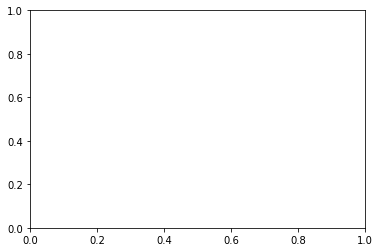

In [68]:
#len(fraaEsen)
plt.plot(nodosAlMenosGradoKAPMS[2],fraaEsen)
plt.xlabel('fracc de nodos al menor grado K')
plt.ylabel('fracc de nodos esenciales de al menor grado K')
plt.legend("fracc de nodos esenciales respecto a los nodos de grado k")
plt.ylim([0,1])